In [1]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
import numpy as np

import matplotlib.pyplot as plt

from sklearn import cluster

In [2]:
X = pd.read_csv('Cosgrove_X_zscore_appended.csv', index_col=0)
Y = pd.read_csv('Cosgrove_Y_zscore.csv', index_col = 0)

In [3]:
# PLSR with 4 principal components
ncomp = 4
pls = PLSRegression(n_components=ncomp)
pls.fit(X, Y)

#loadings, scores, and coefficients are part of the pls class 
#example, x_loadings
x_loadings = pls.x_loadings_

#get percent variance explained in X
total_variance_in_x = np.var(X, axis = 0)
variance_in_x = np.var(pls.x_scores_, axis = 0) 
fractions_of_explained_variance_x = variance_in_x / sum(total_variance_in_x)


#find the predicted outputs 
y_fit = pls.predict(X)

x_scores = pls.x_scores_


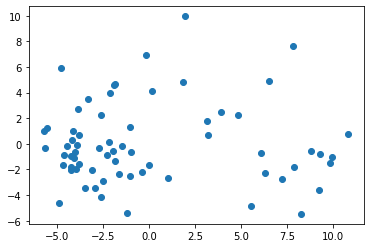

In [4]:
#Plotting the data in X on the first two principal components of the PLSR
plt.scatter(x_scores[:,0], x_scores[:,1])

In [5]:
# cluster the data
kmeans = cluster.KMeans(n_clusters=7, random_state=0).fit(X) #set the random state so it gives you the same result each time.
cInd = kmeans.labels_
ctrds = kmeans.cluster_centers_



In [6]:
#kmeans.labels_ contains the assignment of label classes
cInd

array([6, 6, 6, 6, 4, 1, 3, 6, 3, 6, 4, 1, 6, 6, 6, 6, 4, 1, 3, 3, 3, 2,
       4, 1, 3, 3, 3, 3, 4, 1, 3, 6, 6, 3, 4, 1, 0, 0, 0, 0, 0, 0, 3, 3,
       6, 6, 4, 1, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2],
      dtype=int32)